# SEN122A Statistical Analysis of Choice Behaviour

## `Lab session 01B:`
## `Introduction to choice behaviour analysis`

**Delft University of Technology**<br>
**Q2 2025**<br>
**Instructor:** Sander van Cranenburgh<br>
**TA:**  Gabriel Nova <br>

### `Instructions`

**Lab sessions aim to:**<br>
* Illustrate how models and theory discussed in the classroom work out in practice.
* Help you gather hands-on modelling and data analysis skills.


**Lab sessions are:**<br>
* Learning environments where you work with Python and get support from TA and fellow students.
* Not graded and do not have to be submitted.
* A good preparation for the graded partial exam.

### `Application: Modelling neighbourhood choices`

In this lab session, we will analyse neighbourhood location choice behaviour. Understanding people's preferences over neighbourhood characteristics is crucial for city planners when they (re)develop neighbourhoods or devise policies to tackle e.g. residential segregation. During this lab session, you will apply discrete choice models to uncover people's preferences over attributes, such as the distance to the city centre and the share of foreigners in their neighbourhood. Also, you will explore whether preferences interact with covariates such as age, gender, home ownership, car ownership and urbanisation level. While doing so, you will test various utility specifications and interpret the modelling outcomes of discrete choice models.

For this study, we use data from a Stated Choice (SC) experiment, which was conducted between 2017 and 2018 in four European cities: Hanover, Mainz, Bern, and Zurich.

![SC](./assets/sc_experiment.png)

**`Learning objectives lab session 01B`**

After completing the following lab session, you will be able to:
* Test alternative utility specification with interactions and nonlinearities
* Understand the impact of the sample size on the standard errors of the estimates


**`This lab consists of 2 parts and has 2 exercises`**

**Part 1**: Interactions with socio-demographic variables and nonlinear utilities
- Exerise 1: "Modelling interactions with socio-demographic variables"
- Exerise 2: "Nonlinear utility specifcations"

**Part 2**: Understanding the impact of the sample size on the standard errors of the estimates
- Excerise 3: "Impact of sample size on standard errors"

#### `Import packages`

To begin, we will import all the Python libraries that we will use in this lab session.

In [1]:
# Biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable, log, exp

# General python packages
import sys
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path

# Pandas setting to show all columns when displaying a pandas dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Add the utils folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

# Import the bio_estimation_fcns from the utils folder
import utils.bio_estimation_fcns
from utils.bio_estimation_fcns import print_results

## Part 1: Interactions with socio-demographic variables and nonlinear utilities
In this part, we will: 
1. Load the data. 
1. Estimate the basic linear-additive RUM-MNL model. This model serves as the benchmark.
1. Explore how tastes vary across socio-demographic groups, using interaction terms. Specifically, we will test whether males and females have different of the tasted for the share of foreigners in the neighbourhood.
1. Assess the validity of the the linearity assumption of the utility function by testing a non-linear utility specification.

### `1. Load the data set` <br>

**`Load the data set`** <br>

In [3]:
# Load the data as a pandas dataframe
data_path =  Path(f'data/choice_data.dat')
df = pd.read_csv(data_path, sep='\t')

### `2. The linear-additive RUM-MNL model` <br>

**`Biogeme database`**<br>
To use biogeme, we first need to create the data set as a Biogeme database object using `db.Database()`. This object contains the data in a format compatible with the library functions for model estimation in Biogeme.

In [4]:
# db.Database takes as arguments (1) a name (string) and (2) a data set (pandas dataframe)
biodata = db.Database('Neighboorhood_choice_data', df)

**`Estimation function`** 

To estimate the MNL models, we use the function `estimate_mnl()` that we created in Lab 1.<br>
This time we directly import the function from the file `bio_estimation_fcns.py` and use it to estimate the MNL model.<br>
<br>
The estimation function takes the following inputs:
* Dictionary with the utilities functions for each alternative (**V**)
* Dictionary with the availabilities for each alternative (**AV**)
* Chosen alternatives array (**CHOICE**)
* Biogeme database which contains the relevant attributes and characteristics (**database**)
* Model name (**"string"**)

In [ ]:
# Import the estimation function
from utils.bio_estimation_fcns import estimate_mnl

# Have a look at the file to verify the function is there
print(utils.bio_estimation_fcns.__file__)

**`Biogeme variables`**<br>

Also, we need to create Biogeme objects for all the variables in our data set that we want to use in our model specifications.<br>
The `Variable()` function creates an object that represents the variable values and will allow it to be included in the model estimation function.

In [6]:
# We create Variable objects for each of the variables in the data set that we want to use in the model

# Attributes of alternative 1
STORES1     = Variable('STORES1')
TRANSPORT1  = Variable('TRANSPORT1')
CITY1       = Variable('CITY1')
NOISE1      = Variable('NOISE1')
GREEN1      = Variable('GREEN1')
FOREIGN1    = Variable('FOREIGN1')

# Attributes of alternative 2    
STORES2     = Variable('STORES2')
TRANSPORT2  = Variable('TRANSPORT2')
CITY2       = Variable('CITY2')
NOISE2      = Variable('NOISE2')
GREEN2      = Variable('GREEN2')
FOREIGN2    = Variable('FOREIGN2')
    
# Attributes of alternative 3
STORES3     = Variable('STORES3')
TRANSPORT3  = Variable('TRANSPORT3')
CITY3       = Variable('CITY3')
NOISE3      = Variable('NOISE3')
GREEN3      = Variable('GREEN3')
FOREIGN3    = Variable('FOREIGN3')

# The choice and availabilities of the alternatives
CHOICE      = Variable('CHOICE')
AV1         = Variable('AV1')
AV2         = Variable('AV2')
AV3         = Variable('AV3')

# Socio-economic variables
AGE         = Variable('AGE')
WOMAN       = Variable('WOMAN')
HOMEOWNER   = Variable('HOMEOWNER')
CAROWNER    = Variable('CAROWNER')
RESPCITY    = Variable('RESPCITY')
JOB         = Variable('JOB')

**`The linear-additive utility specification`**

The cell below creates the utility functions for a linear-additive RUM model in Biogeme.

In [7]:
# Give a name to the model    
model_name = 'Linear-additive RUM-MNL'

# Define the model parameters, using the function "Beta()", in which you must define:
# the name of the parameter - usually the name of the variable,
# starting value - usually 0, but can be any number,
# lower bound - usually None, but can be any number,
# upper bound - usually None, but can be any number,
# 0 or 1, indicating if the parameter must be estimated. 0 means estimated, 1 means fixed to the starting value. 
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0)

# Define the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

**`Estimation of the linear-additive RUM-MNL model`**

We pass the model specifications and the database to the estimation function, which returns an object which contains the estimation results.

In [8]:
# Estimate the model
results_MNL = estimate_mnl(V,AV,CHOICE,biodata,model_name)

In [9]:
# Print the estimation statistics
print_results(results_MNL)

# Store the LL of the MNL model for later use
LL_MNL = results_MNL.data.logLike



Results for model Linear-additive RUM-MNL
Nbr of parameters:		6
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7983.546
Likelihood ratio test (null):		3790.351
Rho square (null):			0.192
Rho bar square (null):			0.191
Akaike Information Criterion:	15979.09
Bayesian Information Criterion:	16021.72

              Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.1670        0.0083       -20.15           0.0
B_foreign   -1.1790        0.1119       -10.53           0.0
B_green      0.4154        0.0117        35.49           0.0
B_noise     -0.4390        0.0109       -40.43           0.0
B_stores    -0.0346        0.0027       -13.01           0.0
B_transport -0.0752        0.0026       -29.48           0.0


### `3. Interactions with socio-demographic variables` <br>

Preferences and tastes may vary across socio-demographic segments of the population. By interacting socio-demographic variables with the other attributes, we can obtain insights into how preferences vary across socio-demographic groups.<br>

For example, we can include the variable `WOMAN` as an interaction with one of the attributes, e.g. `FOREIGN`. This allows us to analyse whether there is a difference between males and females in terms of their taste over this attribute. <br>

To specify a model with interactions, we create separate taste parameters for `WOMAN` and for `MAN`, to interact with the attribute `FOREIGN`: <br>

    B_foreign_woman = Beta('B_foreign_woman'  , 0, None, None, 0)
    B_foreign_man   = Beta('B_foreign_man'    , 0, None, None, 0)

    V1 =  ... + (B_foreign_man * (WOMAN == 0) + B_woman_foreign_woman * (WOMAN == 1)) * FOREIGN1

The logical statements (WOMAN == 0) and (WOMAN == 1) are used to create a dummy variable that takes the value 1 if the condition is met and 0 otherwise. This allows us to estimate the gender-specific taste parameters for B_foreign.

In [10]:
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with interaction term'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
B_foreign_man   = Beta('B_foreign_man'  , 0, None, None, 0)
B_foreign_woman = Beta('B_foreign_woman', 0, None, None, 0)

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
# 1 means the alternative is available, 0 means it is not available
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate the model using the estimate_mnl function created before
results_interaction = estimate_mnl(V,AV,CHOICE,biodata,model_name)

# Print the estimation statistics
print_results(results_interaction)



Results for model Linear-additive RUM-MNL with interaction term
Nbr of parameters:		7
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7979.8
Likelihood ratio test (null):		3797.844
Rho square (null):			0.192
Rho bar square (null):			0.192
Akaike Information Criterion:	15973.6
Bayesian Information Criterion:	16023.33

                  Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city          -0.1669        0.0083       -20.15           0.0
B_foreign_man   -1.5114        0.1672        -9.04           0.0
B_foreign_woman -0.8895        0.1508        -5.90           0.0
B_green          0.4155        0.0117        35.50           0.0
B_noise         -0.4394        0.0109       -40.45           0.0
B_stores        -0.0345        0.0027       -12.98           0.0
B_transport     -0.0753        0.0026       -29.50           0.0


**Interpretation:**<br>
The coefficient `B_foreign` represents the marginal utility of the percentage of foreigners in a neighbourhood. Since the estimated coefficient is negative, it means that an increase in the percentage of foreigners in a neighbourhood makes it less attractive.  In this model, we have interacted `gender` with the attribute `FOREIGN`. The parameters `B_foreign_woman` and `B_foreign_man` show that man and woman have different tastes over this attribute. Since the estimated coefficient is much smaller for woman than for man, it indicates that woman place less value on the share of foreigners in a neighbourhood than men.

However, we cannot tell whether this difference in preferences is statistically significant. To do so, we need to specify the model more cleverly...

In [11]:
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with interaction term'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
B_foreign_man   = Beta('B_foreign_man'  , 0, None, None, 0)
B_foreign_woman = Beta('B_foreign_woman', 0, None, None, 0)

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (WOMAN==0) * (B_foreign_man * FOREIGN1) + (WOMAN==1) * ((B_foreign_man + B_foreign_woman) * FOREIGN1)
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (WOMAN==0) * (B_foreign_man * FOREIGN2) + (WOMAN==1) * ((B_foreign_man + B_foreign_woman) * FOREIGN2)
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (WOMAN==0) * (B_foreign_man * FOREIGN3) + (WOMAN==1) * ((B_foreign_man + B_foreign_woman) * FOREIGN3)

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate the model using the estimate_mnl function created before
results_interaction = estimate_mnl(V,AV,CHOICE,biodata,model_name)

# Print the estimation statistics
print_results(results_interaction)



Results for model Linear-additive RUM-MNL with interaction term
Nbr of parameters:		7
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7979.8
Likelihood ratio test (null):		3797.844
Rho square (null):			0.192
Rho bar square (null):			0.192
Akaike Information Criterion:	15973.6
Bayesian Information Criterion:	16023.33

                  Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city          -0.1669        0.0083       -20.15          0.00
B_foreign_man   -1.5114        0.1672        -9.04          0.00
B_foreign_woman  0.6219        0.2253         2.76          0.01
B_green          0.4155        0.0117        35.50          0.00
B_noise         -0.4394        0.0109       -40.45          0.00
B_stores        -0.0345        0.0027       -12.98          0.00
B_transport     -0.0753        0.0026       -29.50          0.00


**Interpretation:**<br>
As can be seen, this model achieves exactly the same model fit. It is the same model, except it is slightly differently parameterises the interaction. In this model, the marginal utility of the share of foreigners for male is given by `B_foreign_man`, while for female it is given by `B_foreign_man` + `B_foreign_woman`. If male and female have the same taste, then `B_foreign_woman` should be insignificantly different from 0. If it is significantly different from 0, then we can conclude that there is a significant difference in the taste for the share of foreigners between male and female.
<br><br>
The results show that the coefficient `B_foreign_woman` is significantly different from 0, which, indeed, indicates that there is a significant difference in the taste for the share of foreigners between male and female.

### `Excersice 1: Modelling interactions with socio-demographic variables`

Investigate whether inhabitants of different cities also have different tastes over the share of foreigners. To investigate this, you need to estimate another MNL model in which you interact the variable `RESPECITY` with `FOREIGN`. Note that RESPCITY has 4 categorical levels.

Interpret your results. <br>

`A` Do you find evidence of taste heterogeneity? I.e. do inhabitants of different cities have different tastes over the share of foreigners?<br>

`B` Use the LRS to determine whether the model with interactions outperforms the linear-additive RUM-MNL model without interactions.

#### `Answers`

In [12]:
# A
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with interaction term RESPCITY'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
B_foreign_rc1   = Beta('B_foreign_rc1'  , 0, None, None, 0)
B_foreign_rc2   = Beta('B_foreign_rc2'  , 0, None, None, 0)
B_foreign_rc3   = Beta('B_foreign_rc3'  , 0, None, None, 0)
B_foreign_rc4   = Beta('B_foreign_rc4'  , 0, None, None, 0)

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (B_foreign_rc1 *(RESPCITY==1) + B_foreign_rc2 *(RESPCITY==2) + B_foreign_rc3 *(RESPCITY==3) + B_foreign_rc4 *(RESPCITY==4)) * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (B_foreign_rc1 *(RESPCITY==1) + B_foreign_rc2 *(RESPCITY==2) + B_foreign_rc3 *(RESPCITY==3) + B_foreign_rc4 *(RESPCITY==4)) * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (B_foreign_rc1 *(RESPCITY==1) + B_foreign_rc2 *(RESPCITY==2) + B_foreign_rc3 *(RESPCITY==3) + B_foreign_rc4 *(RESPCITY==4)) * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate the model using the estimate_mnl function created before
results_interaction_rc = estimate_mnl(V,AV,CHOICE,biodata,model_name)

# Print the estimation statistics
print_results(results_interaction_rc)



Results for model Linear-additive RUM-MNL with interaction term RESPCITY
Nbr of parameters:		9
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7957.129
Likelihood ratio test (null):		3843.185
Rho square (null):			0.195
Rho bar square (null):			0.194
Akaike Information Criterion:	15932.26
Bayesian Information Criterion:	15996.2

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city        -0.1683        0.0083       -20.27          0.00
B_foreign_rc1 -1.8205        0.2358        -7.72          0.00
B_foreign_rc2 -2.5719        0.2756        -9.33          0.00
B_foreign_rc3 -0.5133        0.1901        -2.70          0.01
B_foreign_rc4 -0.5427        0.2194        -2.47          0.01
B_green        0.4176        0.0117        35.56          0.00
B_noise       -0.4403        0.0109       -40.32          0.00
B_stores      -0.0350        0.0027       -13.14          0.00
B_transport   -0.0754        0.0026       -29.46      

A. 

        --> Yes, inhabitants of City 1 and 2 (the German cities) are much more sensitive to the share of foreigners than City 3 and 4 (the Swiss cities). However, given the above parameterisation, we cannot tell whether this difference is statistically significant.
B. 

        --> The LRS is 54. This far exceeds the critical X2 value with 3 degrees of freedom (7.81).

In [13]:
# B
# Compute the LRS
LL_MNL_interaction = results_interaction_rc.data.logLike
LRS = -2*(LL_MNL_interaction - LL_MNL)
print(f'LRS = {LRS:0.2f}')

LRS = -52.83


### `4. Nonlinear utility specifications`

Until now, we have assumed in our utility specification that utility is linear (and additive). This means that the change in utility caused by a unit change in the attribute level is **independent** of attribute's base level. In many situations, this assumption is however behaviourally not realistic. For example, people may experience a larger disutility due to an extra 10 minutes of travel time on a trip of 15 minutes than on a trip of 90 minutes.<br><br>
Next, we are to going investigate the validity of our linearity assumption by testing the alternative hypothesis, i.e. utility is nonlinear.<br>

More specifically, we test the assumption that the utility derived from distance to the grocery store (`STORES`) takes a logarithmic form:

$ V_{i} = \beta_{STORES}\ln(STORESi) + ...$

Because the logarithm is a globally concave function, this assumption implies that the disutility of e.g. a 10-minutes trip is less than the disutility of two trips of 5 minutes. The plot below illustrates this assumption.

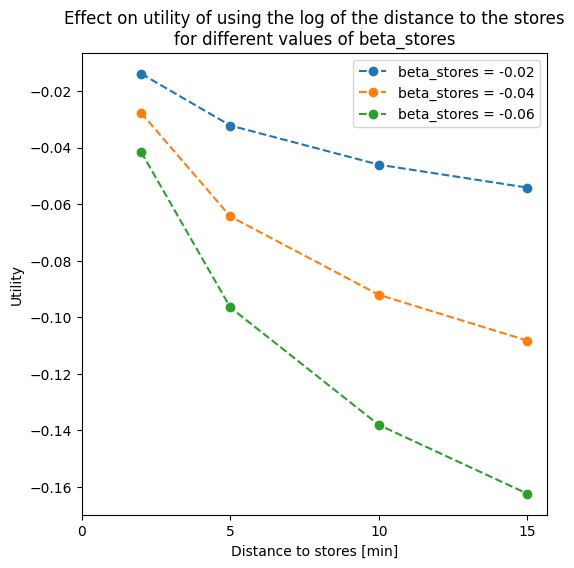

In [14]:
# Illustrate the effect of the log of distance to the stores on the utility
fig, ax = plt.subplots(figsize=(6, 6))
beta_stores = [-0.02, -0.04, -0.06]
for beta in beta_stores:
    x = np.sort(df['STORES1'].unique())
    V = beta*np.log(x)
    ax.plot(x, V, label=f'beta_stores = {beta}', marker='o', linestyle='--')
ax.set_xlabel('Distance to stores [min]')
ax.set_xticks(range(0, 16, 5))
ax.set_ylabel('Utility')
ax.legend()
ax.set_title('Effect on utility of using the log of the distance to the stores\nfor different values of beta_stores')
plt.show()

In [15]:
# Give a name to the model  
model_name = 'MNL with non-linearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 

# Definition of the utility functions
V1 = B_stores * log(STORES1) + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * log(STORES2) + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * log(STORES3) + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate
results_nonlin = estimate_mnl(V,AV,CHOICE,biodata,model_name)   

# Print the estimation statistics
print_results(results_nonlin)



Results for model MNL with non-linearities
Nbr of parameters:		6
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-8002.357
Likelihood ratio test (null):		3752.73
Rho square (null):			0.19
Rho bar square (null):			0.189
Akaike Information Criterion:	16016.71
Bayesian Information Criterion:	16059.34

              Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.1648        0.0083       -19.80           0.0
B_foreign   -1.1535        0.1111       -10.39           0.0
B_green      0.4154        0.0117        35.39           0.0
B_noise     -0.4374        0.0109       -40.17           0.0
B_stores    -0.1949        0.0166       -11.74           0.0
B_transport -0.0743        0.0025       -29.22           0.0


**Interpretation:**<br>
The results clearly show that the model fit **deteriorated** because of the nonlinearity assumption: (LLlin = -7,983.546 against LLnonlin = -8,002.357). Hence, we keep our assumption that utility is linear with the distance to `STORES`.

### `Exercise 2: Nonlinear utility specifications`

Now, let's turn our attention to the attribute `NOISE`. With noise, we expect the opposite effect of diminishing marginal utility. That is, the utility derived from "high" traffic noise (level 4) is probably much worse than that of two times "little" traffic noise (level 2). To investigate this, you need to estimate two nonlinear models, in which you try:

(1) $ V_i = ... + \beta_{noise} \cdot exp(NOISE) + ... $

(2) $ V_i = ... + \beta_{noise} \cdot NOISE + \beta_{noise^2} \cdot NOISE^2 + ...   $

Interpret your results. <br>

`A` Do you find evidence of nonlinear utility? <br>

`B` Which of the two models is statistically the best model?

In [16]:
# Your code and answers

A. Do you find evidence of nonlinear utility? 

        --> Yes, accounting for the nonlinear utility of NOISE leads to a great improvement in model fit
B. Which of the two models is statistically the best model?

        --> Specification 2 obtains the best model fit. It consumes 1 extra parameter. But, the model fit improvement (-7,664.563 vs -7,983.546 for the linear model) far exceeds the critical LRS.

In [17]:
# Give a name to the model  
model_name = 'MNL with nonlinearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 


# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * exp(NOISE1) + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * exp(NOISE2) + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * exp(NOISE3) + B_green * GREEN3 + B_foreign * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate
results_nonlin = estimate_mnl(V, AV, CHOICE, biodata, model_name)

# Print the estimation statistics
print_results(results_nonlin)



Results for model MNL with nonlinearities
Nbr of parameters:		6
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7685.864
Likelihood ratio test (null):		4385.716
Rho square (null):			0.222
Rho bar square (null):			0.221
Akaike Information Criterion:	15383.73
Bayesian Information Criterion:	15426.35

              Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.1798        0.0083       -21.60           0.0
B_foreign   -1.2434        0.1155       -10.77           0.0
B_green      0.4149        0.0122        34.03           0.0
B_noise     -0.0326        0.0008       -41.50           0.0
B_stores    -0.0381        0.0027       -13.98           0.0
B_transport -0.0748        0.0026       -28.43           0.0


In [18]:
# Give a name to the model  
model_name = 'MNL with non-linearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 
B_noise_2    = Beta('B_noise_2'    , 0, None, None, 0)   

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_noise_2 * NOISE1**2 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_noise_2 * NOISE2**2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_noise_2 * NOISE3**2 + B_green * GREEN3 + B_foreign * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate
results_nonlin = estimate_mnl(V, AV, CHOICE, biodata, model_name)

# Print the estimation statistics
print_results(results_nonlin)



Results for model MNL with non-linearities
Nbr of parameters:		7
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7664.563
Likelihood ratio test (null):		4428.318
Rho square (null):			0.224
Rho bar square (null):			0.223
Akaike Information Criterion:	15343.13
Bayesian Information Criterion:	15392.85

              Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.1799        0.0084       -21.36           0.0
B_foreign   -1.3127        0.1170       -11.22           0.0
B_green      0.4106        0.0122        33.53           0.0
B_noise      1.1765        0.0659        17.86           0.0
B_noise_2   -0.3408        0.0139       -24.61           0.0
B_stores    -0.0386        0.0028       -13.97           0.0
B_transport -0.0753        0.0027       -27.91           0.0


### `Categorical treatment of variables` <br>
Alternatively, we can treat the attribute `NOISE` as a categorical variable. This allows us to estimate separate taste parameters for each level of the attribute. This is useful when we do not have a clear idea of the functional form of the utility function.

In [19]:
# Give a name to the model  
model_name = 'MNL with categorical NOISE'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 
B_noise_cat1    = Beta('B_noise_cat1'    , 0, None, None, 1)   
B_noise_cat2    = Beta('B_noise_cat2'    , 0, None, None, 0)   
B_noise_cat3    = Beta('B_noise_cat3'    , 0, None, None, 0)   
B_noise_cat4    = Beta('B_noise_cat4'    , 0, None, None, 0)   

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise_cat1 * (NOISE1==1) + B_noise_cat2 * (NOISE1==2) + B_noise_cat3 * (NOISE1==3) + B_noise_cat4 * (NOISE1==4) + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise_cat1 * (NOISE2==1) + B_noise_cat2 * (NOISE2==2) + B_noise_cat3 * (NOISE2==3) + B_noise_cat4 * (NOISE2==4) + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise_cat1 * (NOISE3==1) + B_noise_cat2 * (NOISE3==2) + B_noise_cat3 * (NOISE3==3) + B_noise_cat4 * (NOISE3==4) + B_green * GREEN3 + B_foreign * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
AV = {1: AV1, 2: AV2, 3: AV3}

# Estimate
results_cat = estimate_mnl(V, AV, CHOICE, biodata, model_name)

# Print the estimation statistics
print_results(results_cat)




Results for model MNL with categorical NOISE
Nbr of parameters:		8
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7644.998
Likelihood ratio test (null):		4467.447
Rho square (null):			0.226
Rho bar square (null):			0.225
Akaike Information Criterion:	15306
Bayesian Information Criterion:	15362.83

               Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city       -0.1804        0.0084       -21.60          0.00
B_foreign    -1.2669        0.1166       -10.87          0.00
B_green       0.4093        0.0122        33.59          0.00
B_noise_cat2  0.0398        0.0320         1.25          0.21
B_noise_cat3 -0.3002        0.0327        -9.17          0.00
B_noise_cat4 -1.6938        0.0459       -36.90          0.00
B_stores     -0.0387        0.0027       -14.18          0.00
B_transport  -0.0742        0.0027       -27.57          0.00


**Interpretation:**<br>
The results show that the model fit is even better when treating `NOISE` as a categorical variable than using the squared term. We can conduct an LRS to determine whether the model with the categorical treatment of `NOISE` outperforms the model with the squared term.
The categorical model consumes 1 extra parameter compared to the previously best model, but the model fit improvement (-7,644.998 vs. -7,664.563) far exceeds the critical LRS.

beta_noise = 0.000 0.040 -0.300 -1.694


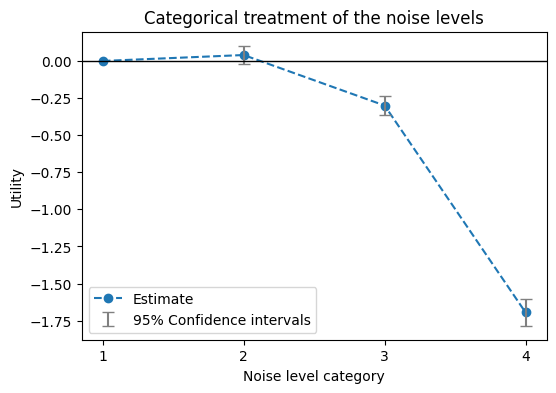

In [20]:
# Illustrate the effect of noise levels the utility
fig, ax = plt.subplots(figsize=(6, 4))

# Add B_noise_cat1 = 0 to the beta_hat_cat
beta_hat_cat = results_cat.get_estimated_parameters()

beta_hat_cat.loc['B_noise_cat1', 'Value']  = 0
beta_noise = beta_hat_cat.loc[['B_noise_cat1','B_noise_cat2','B_noise_cat3','B_noise_cat4'],['Value','Rob. Std err']]
print("beta_noise =", *(f'{b:#0.3f}' for b in beta_noise['Value']))

# Plot the effect of the noise levels on utility
x = list(range(1, 5, 1)) # categories of noise levels
y_est = beta_noise['Value']
y_stderr = 1.96 * beta_noise['Rob. Std err']

ax.plot(x, y_est,'o--',label='Estimate')
ax.errorbar(x, y_est, yerr=y_stderr, fmt='none',ecolor='grey',elinewidth=1.5,capsize=4,label='95% Confidence intervals')
ax.axhline(0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Noise level category')
ax.set_xticks(x)
ax.set_ylabel('Utility')
ax.set_title('Categorical treatment of the noise levels')
ax.legend(loc='best')
plt.show()

**Interpretation:**<br>
* The plot shows that people are indifferent to noise levels 1 and 2. However, they have a strong preference for (avoiding) higher noise levels. People derive especially a big disutility from noise level 4.
* The line is dashed because the model treats `NOISE` as a categorical variable. This means that between the point a linear interpolation is made.  But this is just an assumption. We do not know the exact shape of the utility function.
* The error bars represent the 95% confidence intervals for the estimated utility values. These are calculated as 1.96 times the standard error of the estimate. The error bars indicate the uncertainty in the estimated utility values. If the error bars do not overlap with zero, it indicates that the utility value is significantly different from zero at the 95% confidence level.

## Part 2: Understanding the impact of the sample size on the <br> standard errors of the estimates

The more data observations we have, the more **precise** our estimates will be. In this part, we will investigate how the sample size affects the **standard errors** of the estimates. We will do this by estimating the linear-additive RUM-MNL model with different sample sizes and inspect how the magnitudes of standard errors of the estimates decrease with increasing sample size.

In [21]:
# Define the fractions to sample
frac = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a pandas dataframe to store the results
beta_hat_MNL = results_MNL.get_estimated_parameters()
df_std_err_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=frac)

# Loop over the fractions
for fraction in frac:
    
    # Randomly sample frac% of the data
    df_frac = df.sample(frac=fraction, random_state=42)  # Using random_state for reproducibility

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac)


    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with {fraction*100}% of the data'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Dictionary to associate utility functions with the numbering of alternatives
    V  = {1: V1, 2: V2, 3: V3}

    # Dictionary to associate the availability conditions with the numbering of the alternatives
    AV = {1: AV1, 2: AV2, 3: AV3}

    # Estimate the model
    results_MNL_frac = estimate_mnl(V, AV, CHOICE, biodata_frac, model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_std_err_frac.loc[:,fraction] = beta_hat_MNL_frac['Rob. Std err']
    
# Show the results
df_std_err_frac

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
B_city,0.02526,0.018154,0.014967,0.013034,0.011612,0.010691,0.009879,0.009278,0.008733,0.008284
B_foreign,0.348239,0.247975,0.205166,0.178202,0.159303,0.145421,0.134435,0.125684,0.118195,0.111915
B_green,0.034962,0.025458,0.021084,0.018355,0.016538,0.015224,0.014047,0.013201,0.012391,0.011703
B_noise,0.032538,0.023652,0.019274,0.016698,0.015113,0.014013,0.012945,0.012161,0.011446,0.01086
B_stores,0.008361,0.005865,0.004878,0.004237,0.003771,0.003442,0.003194,0.00299,0.002813,0.002658
B_transport,0.007728,0.005408,0.004456,0.003916,0.003535,0.003275,0.003042,0.00285,0.00269,0.002551


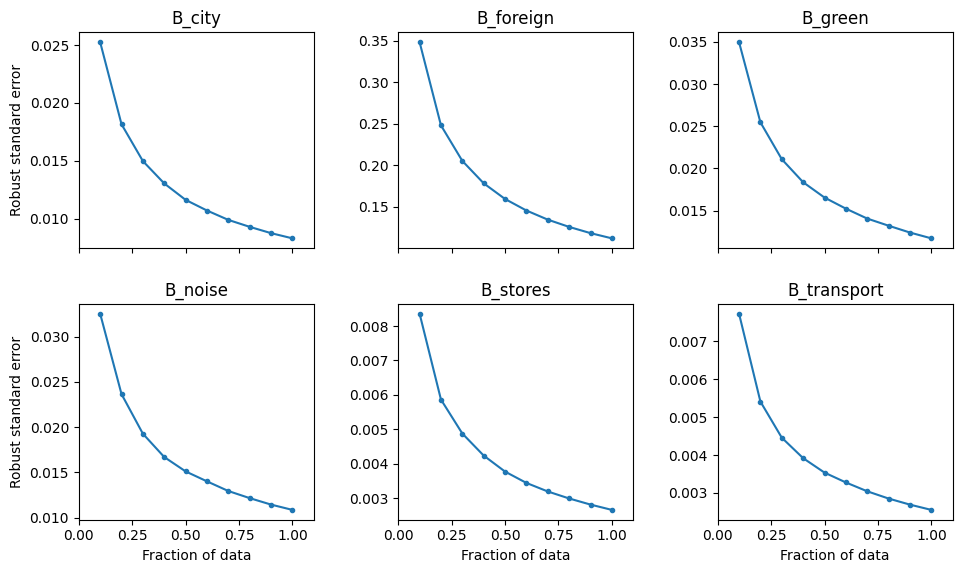

In [22]:
# Let's plot the standard errors for each beta as a function of the fraction of data
fig, ax = plt.subplots(2,3,figsize=(10, 6), sharex=True)
fig.tight_layout(pad=3.0)
ax = ax.flatten()   
for i, beta in enumerate(beta_hat_MNL.index):
    # Plot the standard errors for each beta
    ax[i].plot(frac, df_std_err_frac.loc[beta].values, marker='.')
    ax[i].set_title(beta)
    ax[i].set_xlim(0, 1.1)
    if i >=3:
        ax[i].set_xlabel('Fraction of data')

ax[0].set_ylabel('Robust standard error')   
ax[3].set_ylabel('Robust standard error')   
plt.show()

### `Exercise 3: Standard errors`
Standard errors tell us how different the 𝛽 ̂s would have been if we had estimated the same choice model on a new sample of the same size. In the plot above, the standard errors are computed based on the second order derivatives of the log-likelihood function. Therefore, these are called "analytical standard errors". Another way to obtain the standard errors, is through a **sampling** approach (aka bootstrapping). This entails estimating the model numerous times based on a random sample of the data.
<br>

`A` Use sampling to investigate the standard errors of the estimates. Estimate the linear-additive RUM-MNL model hundred times, using a small fraction of 10%. 
<br>
Hint: to ensure that you draw different samples each time, you can use the `sample()` function, set the `random_state` parameter to a different value each time, e.g. `random_state=1`, `random_state=2`, etc.

`B` Can you reproduce the magnitudes of the standard errors in the plot above?<br>

`C` Suppose that you would use a larger sampling fraction (e.g. 99%). Can you still reproduce the magnitudes of the standard errors in the plot above?<br>

#### `Answers`

In [23]:
# A
# Define the fractions to sample
fraction = 0.1
repetitions = 100

# Create a pandas dataframe to store the results
df_est_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=range(repetitions))

# Loop over the fractions
for i in range(repetitions):
    
    # Randomly sample frac% of the data
    df_frac = df.sample(frac=fraction, random_state=i)

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac)

    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with {fraction*100}% of the data'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Dictionary to associate utility functions with the numbering of alternatives
    V  = {1: V1, 2: V2, 3: V3}

    # Dictionary to associate the availability conditions with the numbering of the alternatives
    AV = {1: AV1, 2: AV2, 3: AV3}

    # Estimate the model
    results_MNL_frac = estimate_mnl(V, AV, CHOICE, biodata_frac, model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_est_frac.loc[:,i] = beta_hat_MNL_frac['Value']

# Compute the standard deviation of the estimates
std_empirical = df_est_frac.T.std()

# Show the results
std_empirical

B_city         0.022568
B_foreign      0.348495
B_green        0.036237
B_noise        0.031437
B_stores       0.008651
B_transport    0.006973
dtype: object

In [24]:
# B
std_analytical = df_std_err_frac[fraction]

# Compare the empirical and analytical standard errors
std_comparison = pd.DataFrame({'Empirical':std_empirical, 'Analytical':std_analytical,'Ratio':std_analytical/std_empirical})

# Show the results
std_comparison.style.format("{:.3f}")

,Empirical,Analytical,Ratio
B_city,0.023,0.025,1.119
B_foreign,0.348,0.348,0.999
B_green,0.036,0.035,0.965
B_noise,0.031,0.033,1.035
B_stores,0.009,0.008,0.967
B_transport,0.007,0.008,1.108


**Interpretation:**<br> 
The ratios of the analytical standard errors over the empirical standard errors are very close to 1. This indicates that the analytical standard errors are a good approximation of the empirical standard errors.  

In [25]:
# C
# This sampling approach will fail with a large fraction (e.g. of 99%), as the empirical standard errors will approach zero. 
# This is because we are not really sampling from the target population. Instead we sample from the sample. 
# Hence, the analytical standard errors are much larger (and more reliable) than the empirical standard errors which treats the sample as if it were the population.